## Distance Function
Returns closest clone Location, distance to clone (in units of LSS), and application of generators to produce clone. Inputs; 
<br> **Topology** : From {'E2', 'E3', 'E4', 'E5', 'E6', 'E12'}
<br> **L1, L2, L3** : Length Scale for 'fundamental domain' edges
<br> **alpha, beta, gamma** : Angles for FD, (only alpha relevant for orientable topologies)
<br> **x, y, z** : Location of observer in FD

In [1]:
import SingleCloneDistance as d
import numpy as np

Topology = 'E2'

L1, L2, L3 = 1.2, 1, 0.55 #Side length parameters (For E6: LCx, LAy, LBz)

alpha, beta, gamma = np.pi/2, np.pi/2, np.pi/2

x, y, z = 0, 0, 0     #Position of "you" in space from origin of (L1, L2, L3)

L_Scale = np.array([L1,L2,L3])
angles = np.array([alpha,beta,gamma])
pos = np.array([x,y,z])

cloneInfo = d.distance_to_CC(Topology, L_Scale, pos, angles)
print(f"Closest clone is {cloneInfo[0]} at a distance of {cloneInfo[1]} by applying the generator combo\n {cloneInfo[2]}")

Closest clone is [ 0.    0.   -0.55] at a distance of 0.55 by applying the generator combo
 ['g3', 'pure translations: ', ('g1', -0.0), ('g2', -0.0), ('g3', 1.0)]


## Topology Sampling
Samples the Topology (given the choice of parameters) to find fraction of points *without* matching circles, identified as 'allowed points'. In conjunction with the second code block; shows the location of allowed and rejected points.
<br> **Topology** : From {'E2', 'E3', 'E4', 'E5', 'E6', 'E12'}
<br> **L1, L2, L3** : Length Scale for 'fundamental domain' edges
<br> **alpha, beta, gamma** : Angles for FD, (only alpha relevant for orientable topologies)
<br> **precision** : The number of points to sample in the generated Dirichlet domain

In [2]:
import sampleTopology as sT
import numpy as np

Topology = 'E2'

L1, L2, L3 = 1.1, 1.1, 0.9                             #Side length parameters (For E6: LCx, LAy, LBz)

alpha, beta, gamma = np.pi/2, np.pi/2, np.pi/2         #(For E12: alpha = 0)

precision = 10000                                      #Number of points in manifold to test


percents, excludedPoints, allowedPoints = sT.samplePoints(Topology, np.array([alpha, beta, gamma]), precision, np.array([L1, L2, L3]))

print(f'Percent of points allowed {percents}')

Percent of points allowed 0.5012


### To be run in conjunction with the previous code block

Plots the associated E1 for the chosen manifold, given the sampling data produced above. 

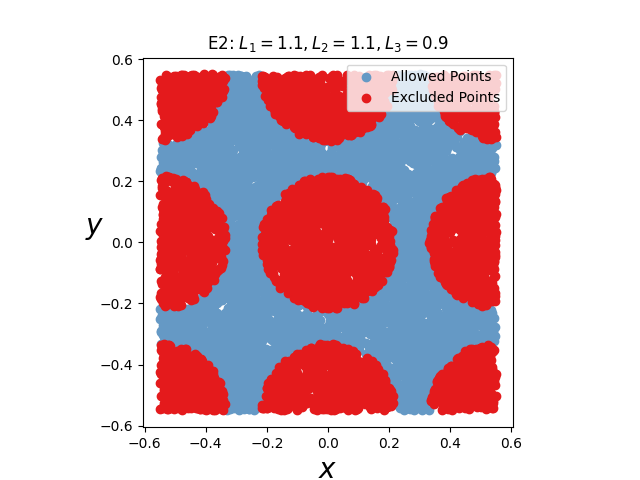

In [3]:
import matplotlib.pyplot as plt

L_x, L_y, L_z = allowedPoints[0], allowedPoints[1], allowedPoints[2]
excludedPoints_x, excludedPoints_y, excludedPoints_z = excludedPoints[0], excludedPoints[1], excludedPoints[2]

plt.close('all')
fig = plt.gcf()
ax = fig.gca()

plt.title(rf"{Topology}: $L_1 = {L1}, L_2 = {L2}, L_3 = {L3}$")
ax.scatter(L_x, L_y, color = '#6599C5', alpha = 1, label = "Allowed Points")
ax.scatter(excludedPoints_x, excludedPoints_y, color = '#E41A1C', alpha = 1, label = "Excluded Points")
plt.xlabel(r'$x$', fontsize = 20)
plt.ylabel(r'$y$', fontsize = 20, rotation = 0)
plt.legend()
ax.set_aspect(1)

In [11]:
import numpy as np
import numba as nb
np.random.seed(seed=1234)

@nb.njit()
def append_to_list(x):
    new_x = []

    for i in range(x.size):
        new_x.append(x[i])
    return np.array(new_x)

@nb.njit()
def place_in_array(x):
    new_x = np.empty(x.size)

    for i in range(x.size):
        new_x[i] = x[i]
    return new_x

In [21]:
for logN in range(1, 11):
    N = int(10**logN)
    print(N)
    values = np.random.uniform(size=N)
    %timeit -n 1000 append_to_list(values)
    %timeit -n 1000 place_in_array(values)
    print()

1.04 µs ± 300 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
793 ns ± 116 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)

1.43 µs ± 357 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
781 ns ± 37.7 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)

902 ns ± 41.2 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
The slowest run took 6.66 times longer than the fastest. This could mean that an intermediate result is being cached.
1.91 µs ± 1.63 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

4.91 µs ± 331 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.11 µs ± 1.84 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

52.1 µs ± 7.93 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
71.2 µs ± 32.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

756 µs ± 243 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
671 µs ± 30.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

23.8 ms ± 464 µs per l

KeyboardInterrupt: 